In [1]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

#basic externals
import pandas as pd
import numpy as np
import os
import matplotlib as plt 

%matplotlib inline
%reload_ext autoreload
%autoreload 2


InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
    )  # display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

In [2]:
import torch
torch.cuda.get_device_name(0)


'GeForce GTX 970'

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16

In [4]:
path_img = os.path.normpath('fastai')
#not working

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[]

In [6]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(),valid_pct=0.2, size=224, bs=bs).normalize(imagenet_stats)


In [7]:
print(data.classes)
len(data.classes),data.c

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

(120, 120)

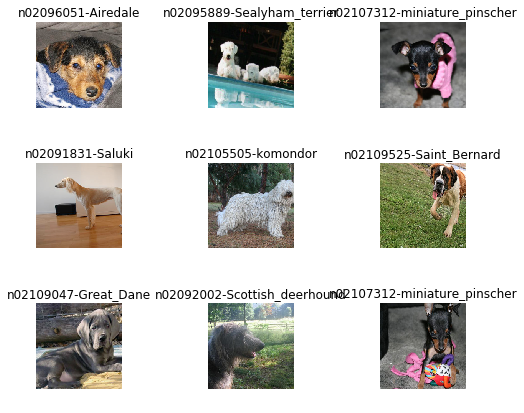

In [8]:
data.show_batch(rows=3, figsize=(7,6))

### Training: vgg16



In [10]:
## This is a workaround as learn_cnn gets stuck
def get_model(pretrained=True, model_name='resnet34' , **kwargs ):
    if model_name == 'resnet18':
        arch = models.resnet18(pretrained, **kwargs )
    if model_name == 'resnet34':
        arch = models.resnet34(pretrained, **kwargs )
    if model_name == 'resnet50':
        arch = models.resnet50(pretrained, **kwargs )
    if model_name == 'vgg16':
        arch = models.vgg16(pretrained, **kwargs )
    return arch
learn = Learner(data, get_model('vgg16'), metrics=[accuracy])

In [11]:
learn.model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [12]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,3.285065,3.766439,0.179300,03:58
1,3.323572,3.947093,0.135811,03:56
2,2.731878,2.881233,0.269193,03:54
3,2.141057,2.163445,0.405734,03:55
4,1.832841,1.656697,0.528669,03:54
5,1.414645,1.286009,0.622449,03:54
6,1.076228,1.131973,0.667638,03:52
7,0.944165,1.081315,0.678571,03:51


In [13]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

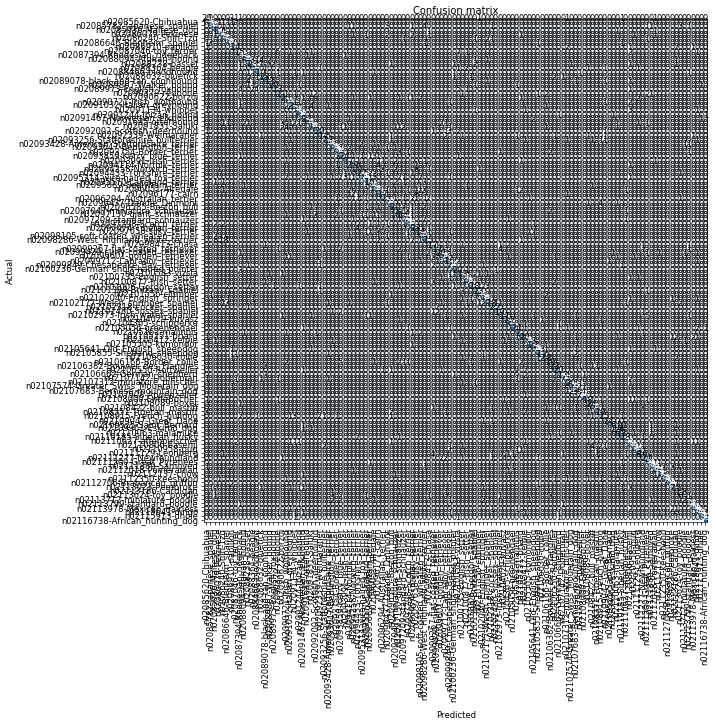

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:

interp.most_confused(min_val=2)

[('n02098413-Lhasa', 'n02086240-Shih-Tzu', 18),
 ('n02097209-standard_schnauzer', 'n02097047-miniature_schnauzer', 10),
 ('n02109961-Eskimo_dog', 'n02110063-malamute', 10),
 ('n02109961-Eskimo_dog', 'n02110185-Siberian_husky', 10),
 ('n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 9),
 ('n02106030-collie', 'n02105855-Shetland_sheepdog', 9),
 ('n02106662-German_shepherd', 'n02105162-malinois', 9),
 ('n02094433-Yorkshire_terrier', 'n02097658-silky_terrier', 8),
 ('n02096294-Australian_terrier', 'n02097658-silky_terrier', 8),
 ('n02098413-Lhasa', 'n02085936-Maltese_dog', 8),
 ('n02113624-toy_poodle', 'n02113712-miniature_poodle', 8),
 ('n02087394-Rhodesian_ridgeback', 'n02100583-vizsla', 7),
 ('n02088364-beagle', 'n02088238-basset', 7),
 ('n02093428-American_Staffordshire_terrier',
  'n02093256-Staffordshire_bullterrier',
  7),
 ('n02095570-Lakeland_terrier', 'n02095314-wire-haired_fox_terrier', 7),
 ('n02097047-miniature_schnauzer', 'n02097209-standard_schnauzer', 7),
 ('n02

In [17]:
learn.unfreeze()


In [18]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,1.244010,1.198735,0.655977,03:50


In [23]:
learn.load('stage-1');
learn.lr_find()


Learner(data=ImageDataBunch;

Train: LabelList (16464 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua,n02085620-Chihuahua
Path: fastai;

Valid: LabelList (4116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n02095570-Lakeland_terrier,n02096437-Dandie_Dinmont,n02102177-Welsh_springer_spaniel,n02107683-Bernese_mountain_dog,n02106382-Bouvier_des_Flandres
Path: fastai;

Test: None, model=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1):

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


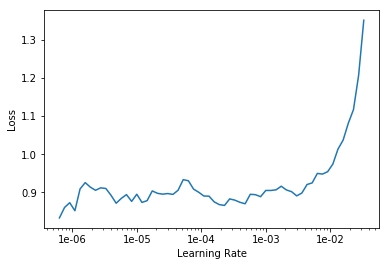

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.884922,1.066632,0.684645,04:22


 0.68 acc not as good as Xception Keras!